In [1]:
%matplotlib inline

import os
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp
import pandas as pd
pd.set_option("display.precision", 2)
from scipy.interpolate import interp1d
from utils.process_ppg import load_PPG_signal, get_filtered_ppg, get_ppg_measures_batch

%matplotlib inline

0
id is 1647264808.00
1


C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


id is 1647265213.00
2
id is 1647265691.00


C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently 

3
id is 1647267334.00
4
id is 1647267651.00


C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\AppData\Local\Temp\ipykernel_24656\3083455488.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,4))
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline,

5
id is 1647268069.00
6
id is 1647268497.00


C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


7
id is 1647268988.00
8
id is 1647269598.00


C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


9
id is 1646752964.00
10
id is 1646754723.00


C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


11
id is 1646755454.00
12
id is 1646756026.00
13


C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently 

id is 1646756620.00
14
id is 1646757051.00


C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently 

15
id is 1646757757.00
16


C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


id is 1646758277.00
17
id is 1646230801.00
18
id is 1646231516.00


C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\numpy\ma\core.py:5244: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\l

19
id is 1646232320.00
20
id is 1646233411.00
21
id is 1646234438.00


C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rob\anaconda3\envs\HRI\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


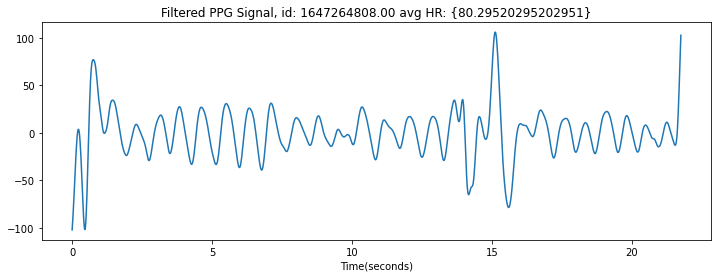

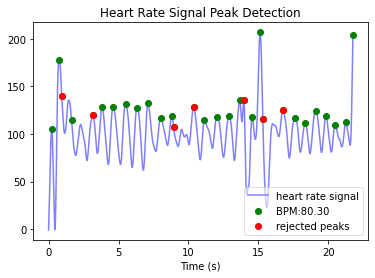

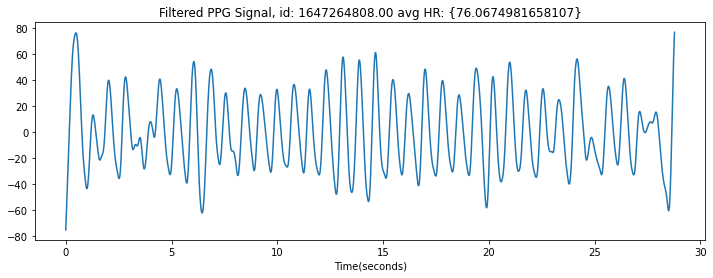

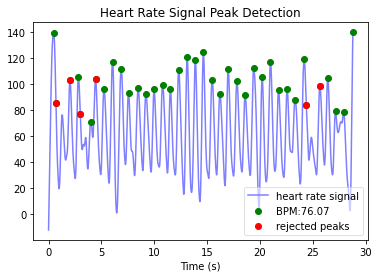

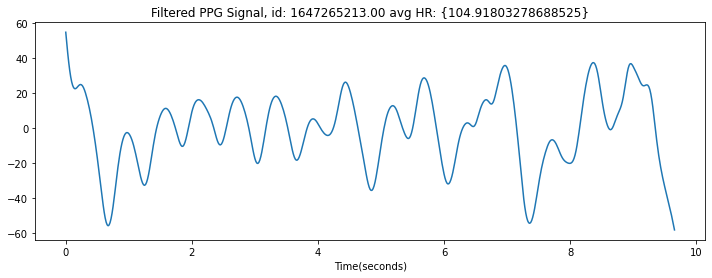

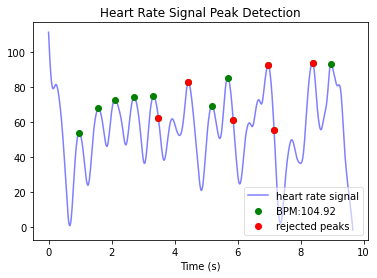

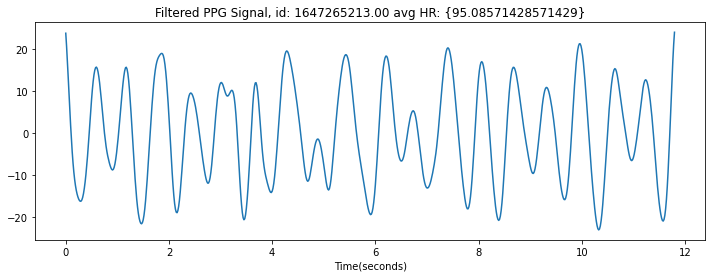

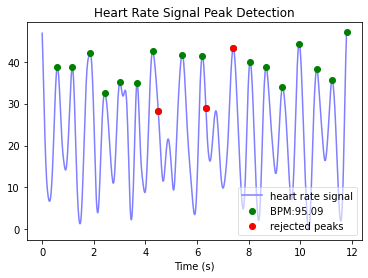

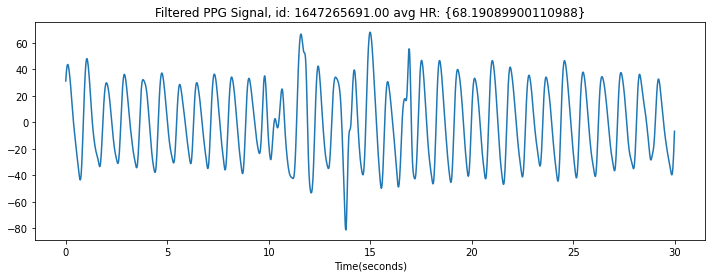

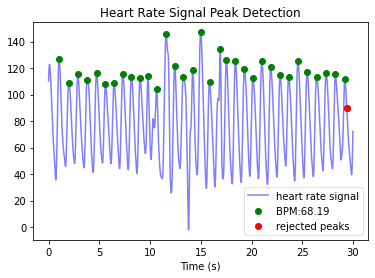

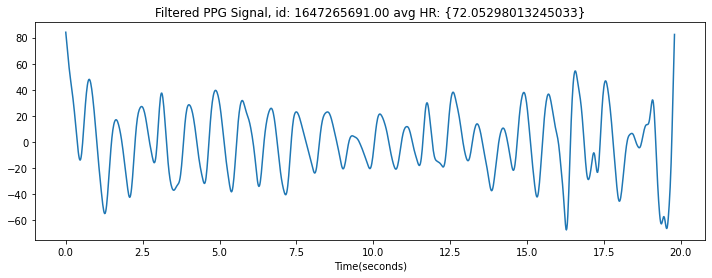

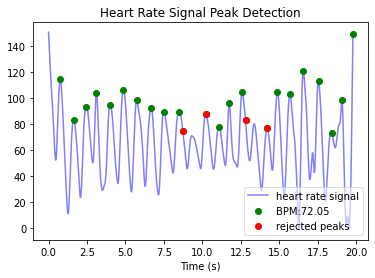

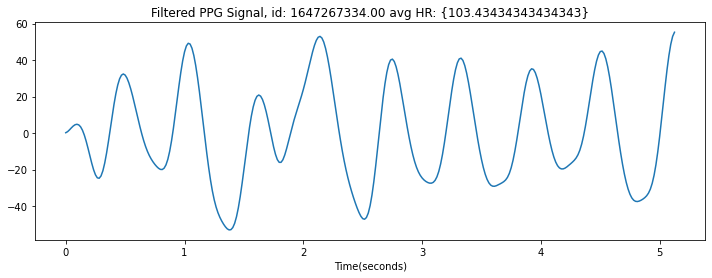

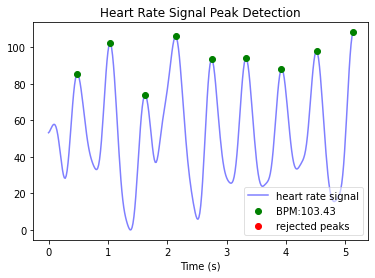

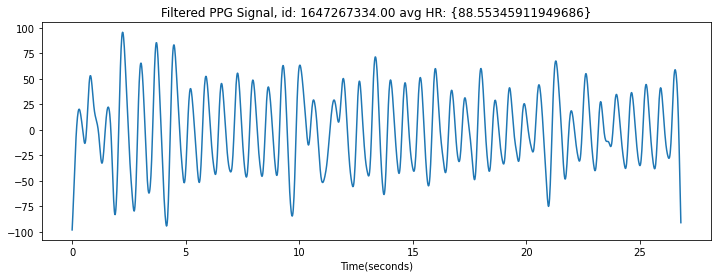

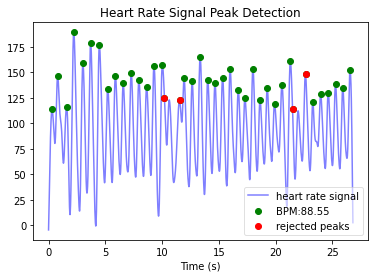

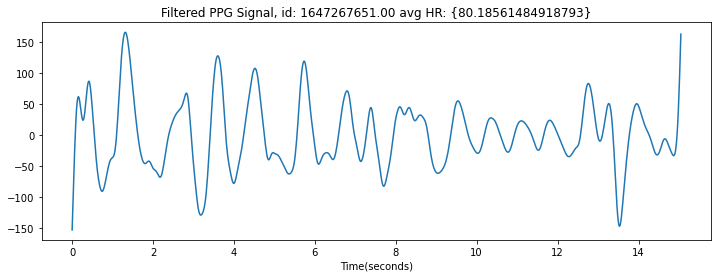

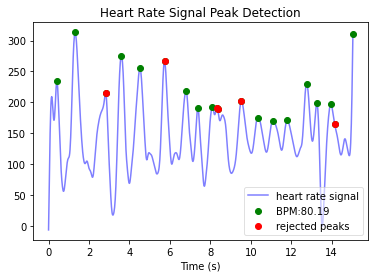

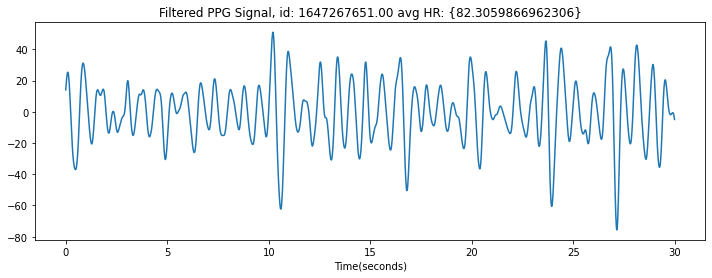

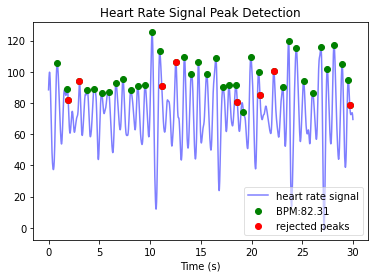

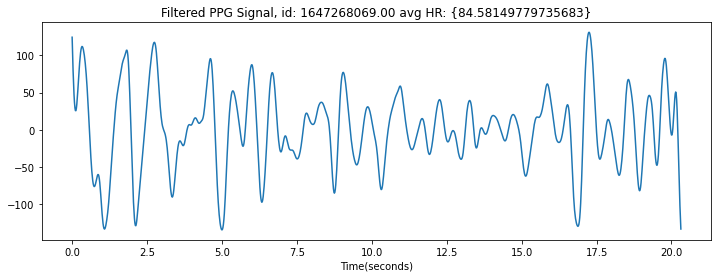

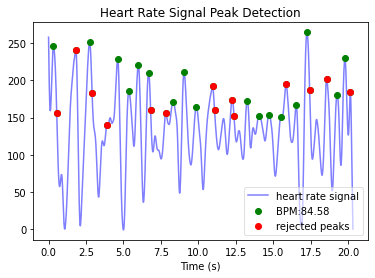

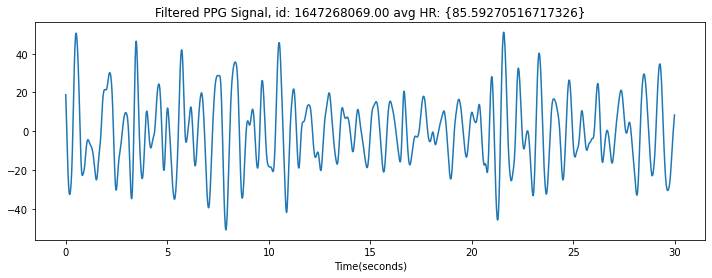

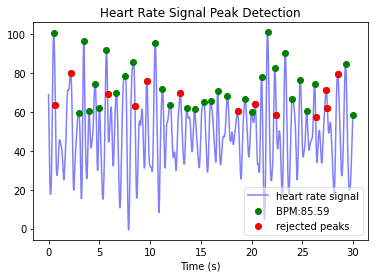

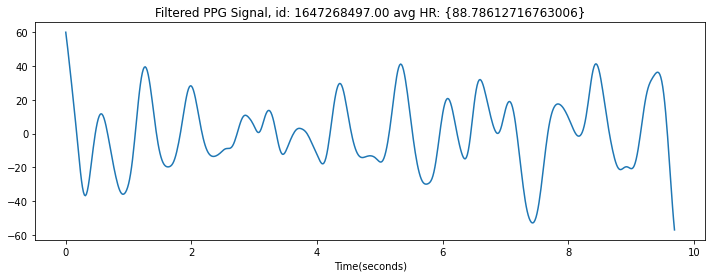

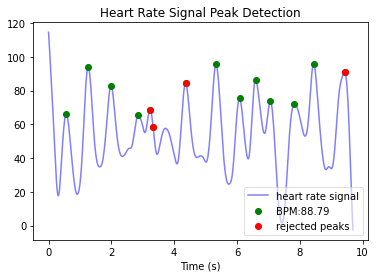

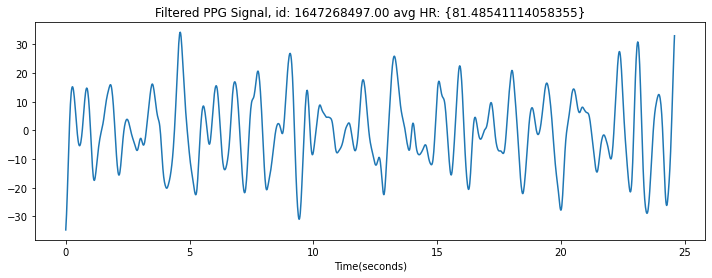

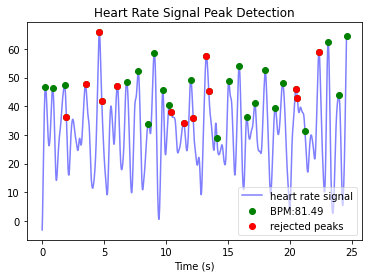

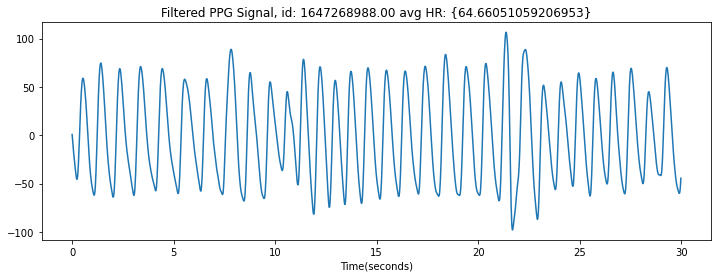

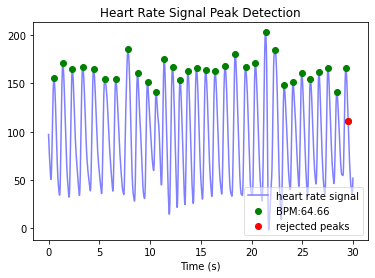

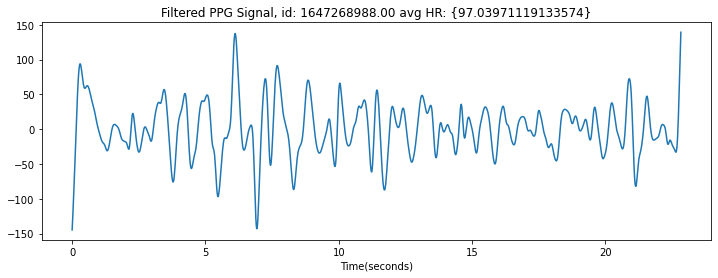

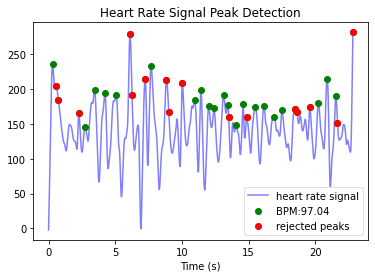

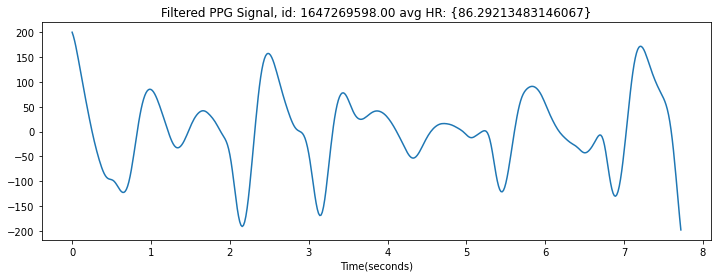

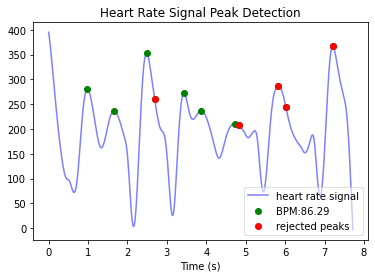

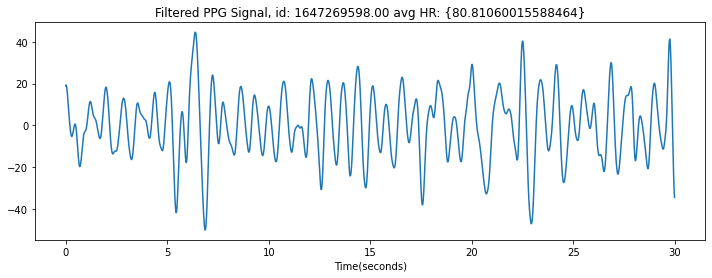

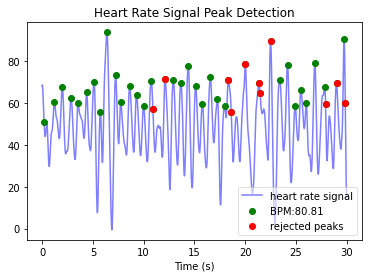

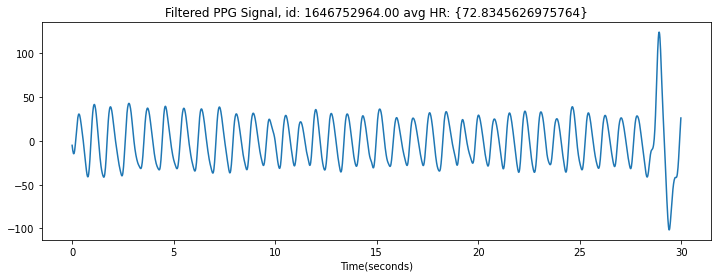

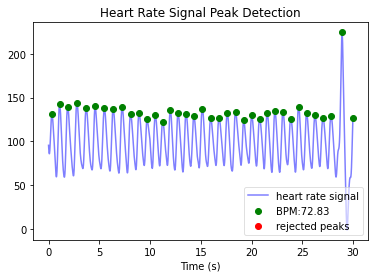

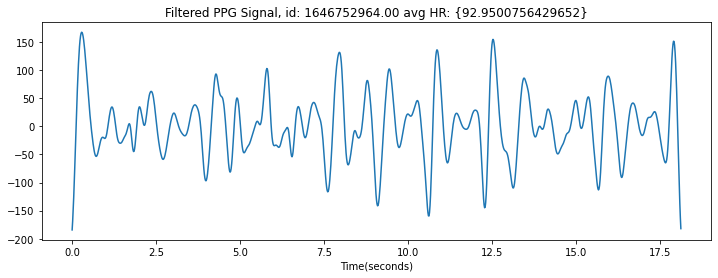

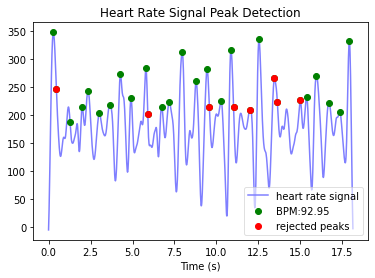

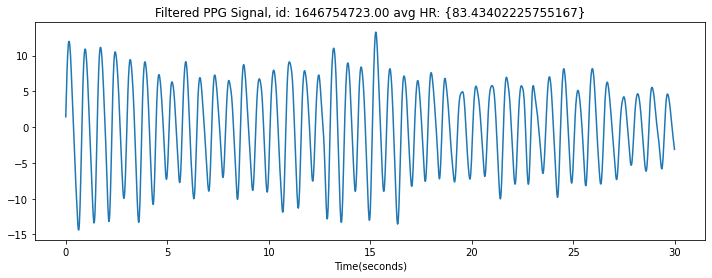

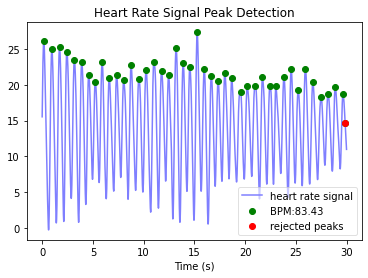

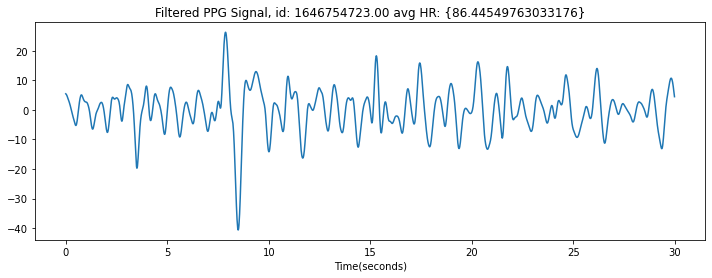

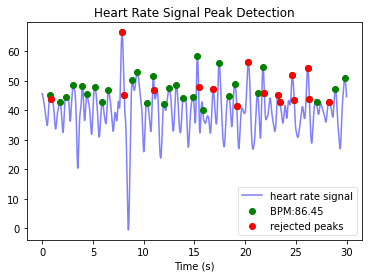

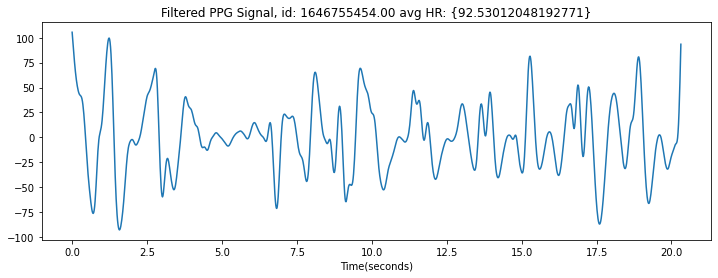

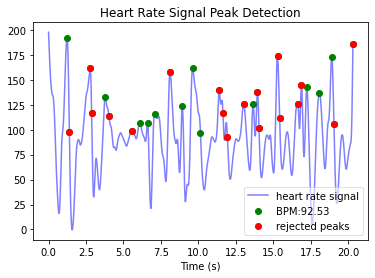

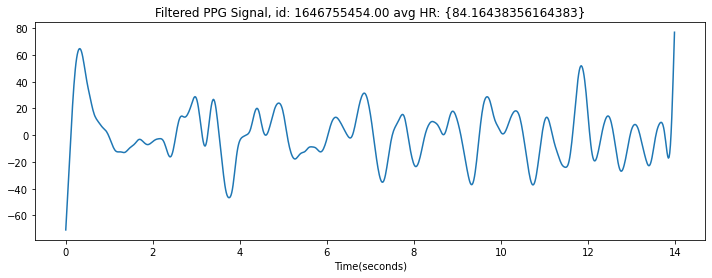

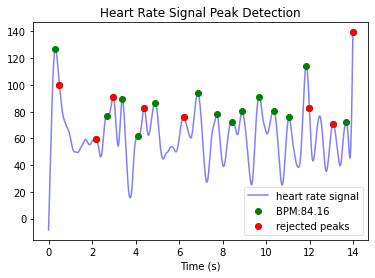

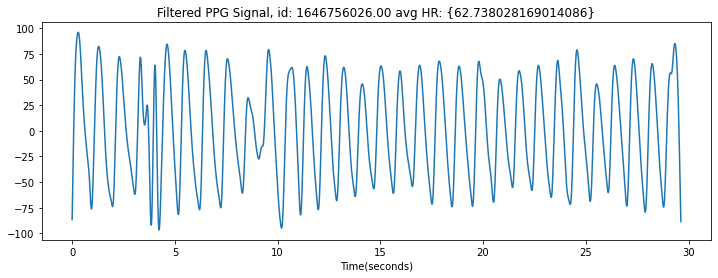

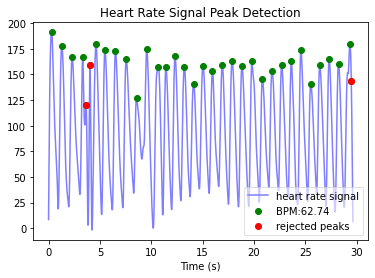

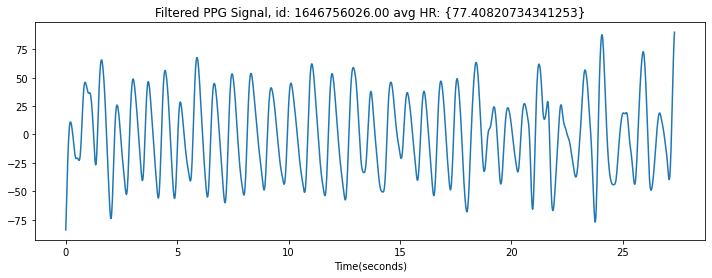

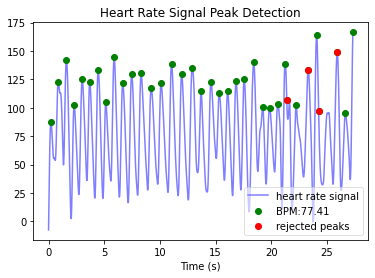

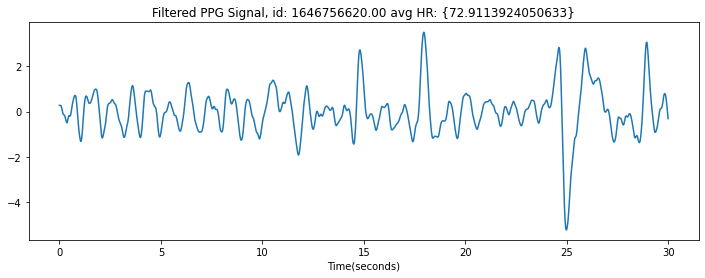

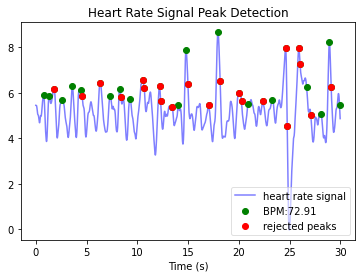

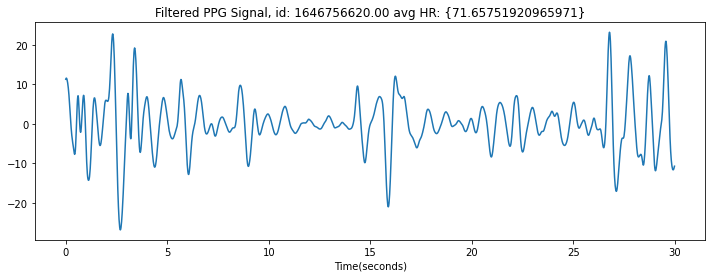

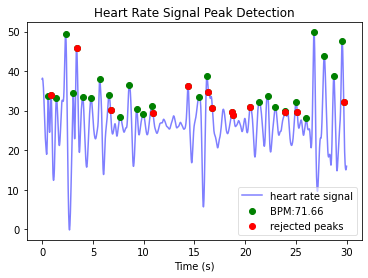

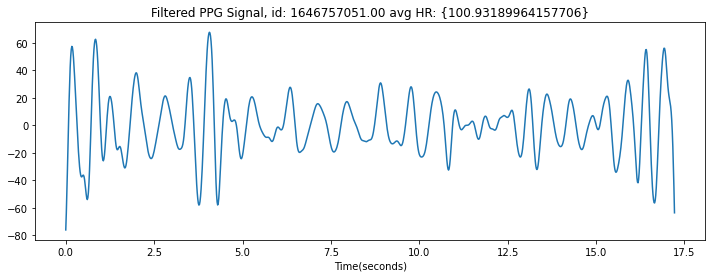

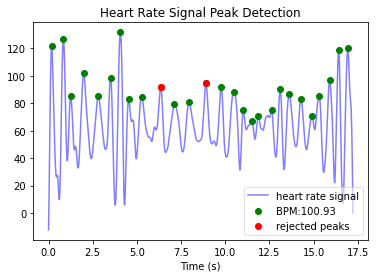

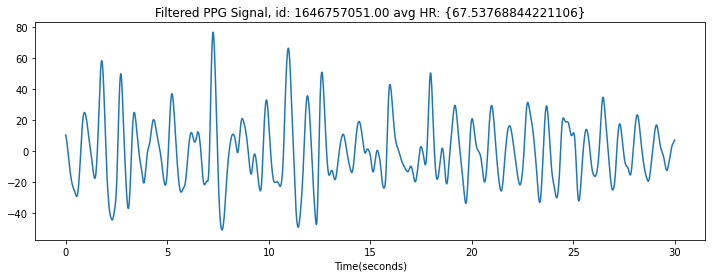

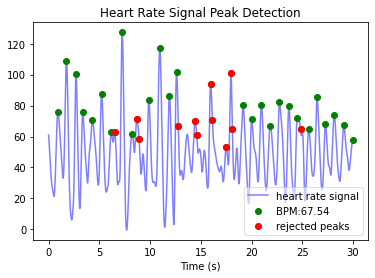

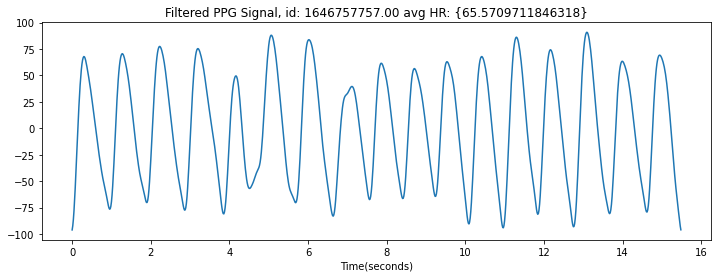

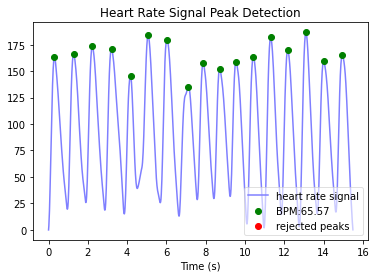

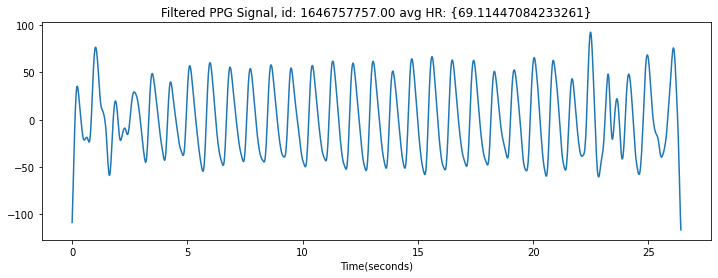

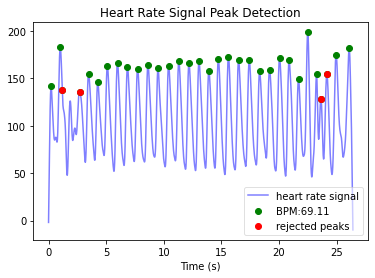

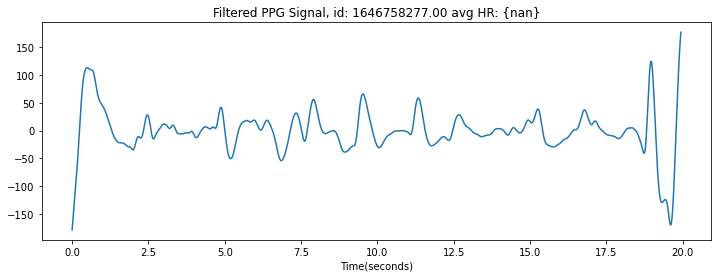

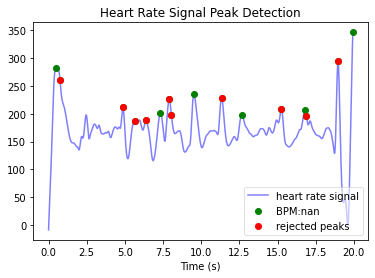

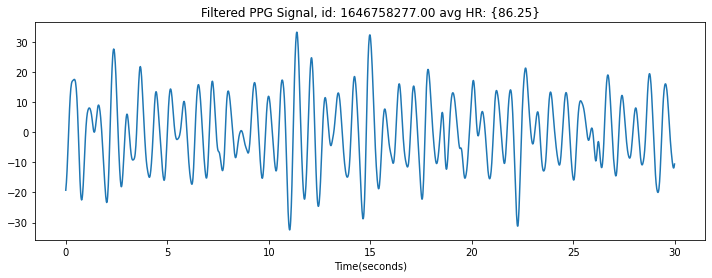

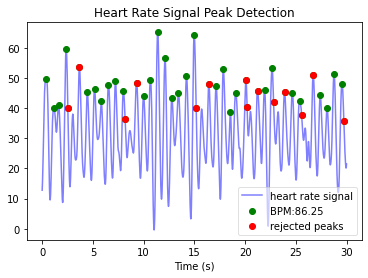

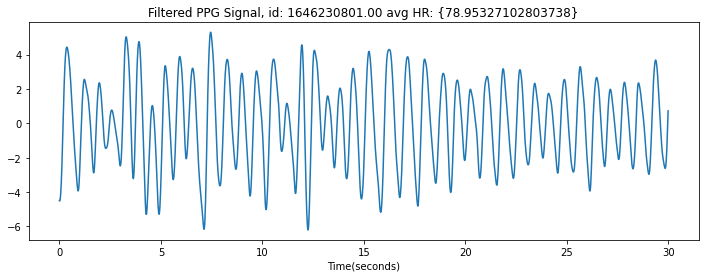

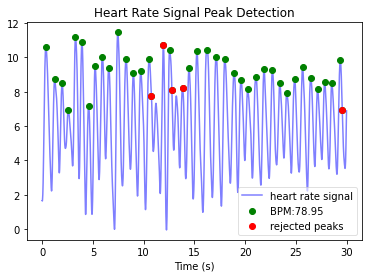

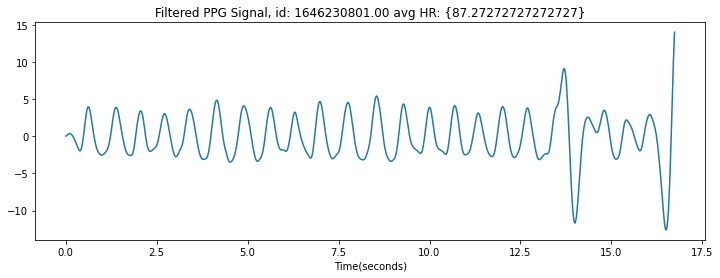

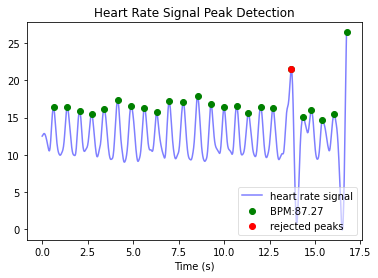

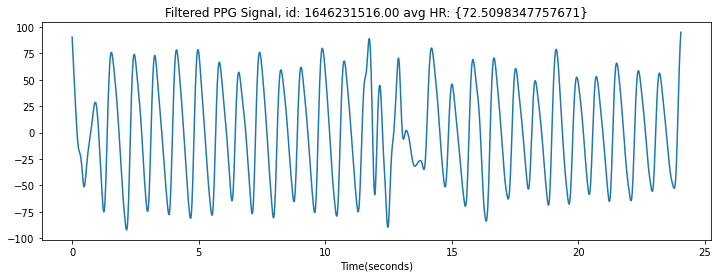

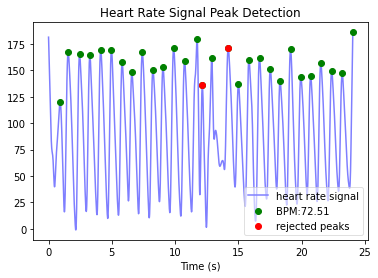

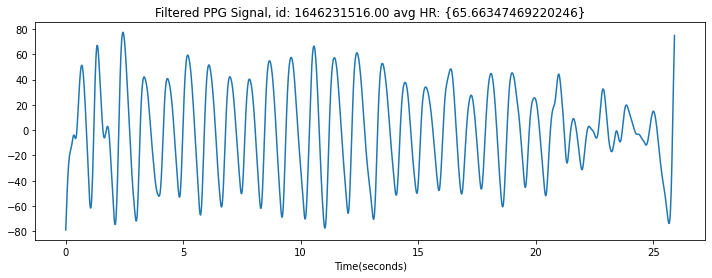

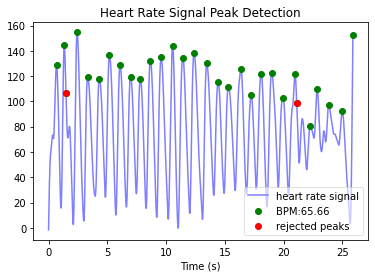

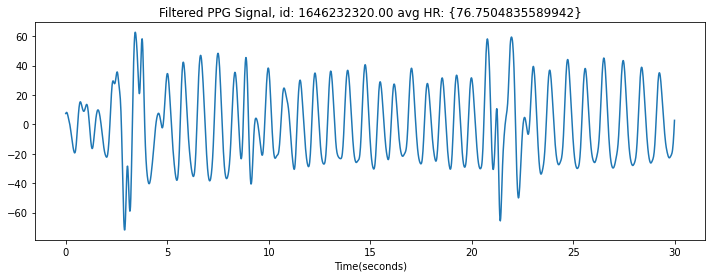

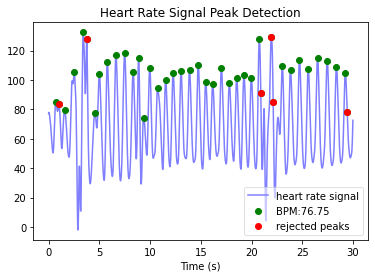

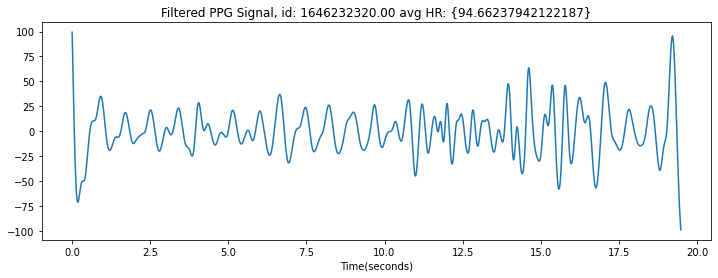

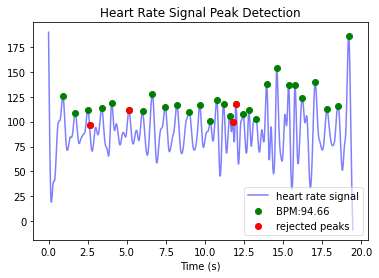

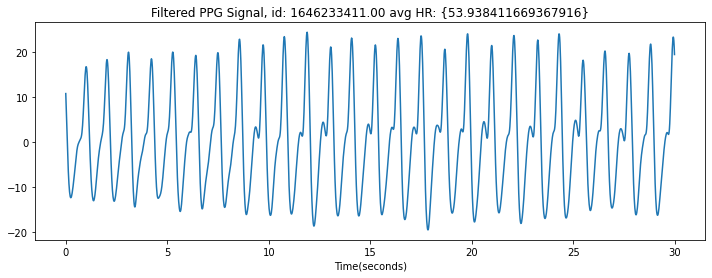

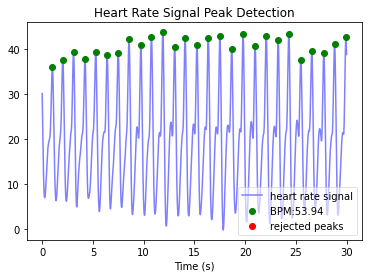

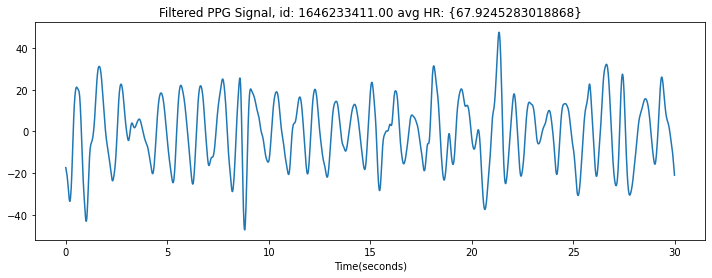

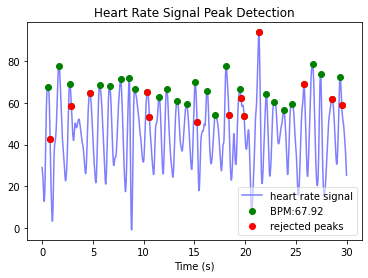

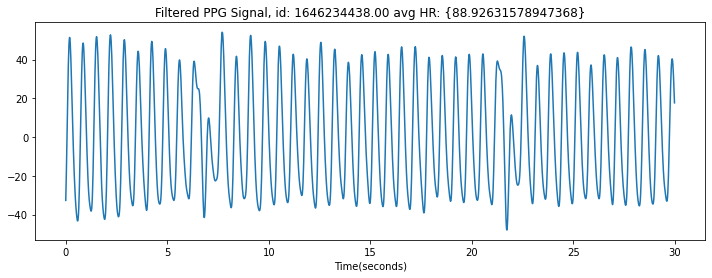

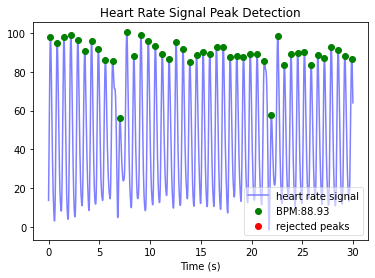

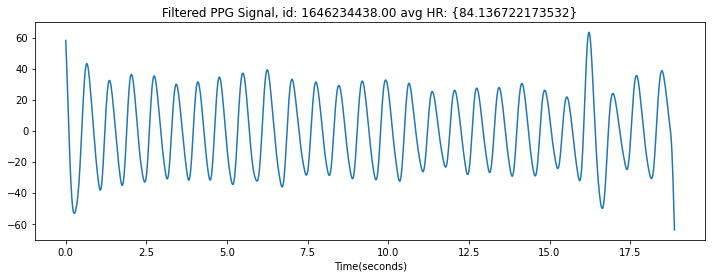

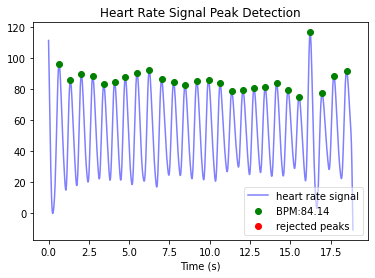

In [2]:
def calc_HRV_measures(signal,sample_rate=64.0,id=''):
    t_elapsed = np.arange(0,len(signal))
    t_elapsed = t_elapsed/sample_rate
    #filtered = get_filtered_ppg(signal, t_elapsed, sample_rate=sample_rate)
    filtered = get_filtered_ppg(signal, sample_rate=sample_rate)
    #filtered = hp.enhance_peaks(filtered)
    if len(filtered) > 30*sample_rate:
        start_indx = int(((len(filtered)//2) - (15*sample_rate)))
        end_indx = int(((len(filtered)//2) + (15*sample_rate)))
        filtered = filtered[start_indx : end_indx]
    wd, m = hp.process(filtered, sample_rate = sample_rate)
    plt.figure(figsize=(12,4))
    x_axis = [i/sample_rate for i in range(len(filtered))]
    plt.plot(x_axis, filtered)
    plt.xlabel('Time(seconds)')
    #plt.title('Filtered PPG Signal, id:{} avg HR: {:.2f}'.format(id,str(m['bpm'])))
    plt.title('Filtered PPG Signal, id: '+id+' avg HR: '+str({m['bpm']}))
    hp.plotter(wd,m)

   # for measure in m.keys():
   #     print(measure, m[measure])

    return m

def calc_diff(baseline_sig,game_sig,id=''):
    base_dict = calc_HRV_measures(baseline_sig,id=id)
    game_dict = calc_HRV_measures(game_sig,id=id)
    diff = {}
    for key in base_dict:
        diff['perc_'+key] = game_dict[key]/base_dict[key]
        diff['abs_'+key] = game_dict[key] - base_dict[key]

    #print(perc_diff)
    #print(abs_diff)
    return diff



folder = './Data'
HR_path = folder+"/**/HR.csv"
PPG_path = folder + "/**/BVP.csv"
tag_path = folder + "/**/tags.csv"

#Load raw PPG data
PPG_csv_paths = glob.glob(PPG_path, recursive=True)

#Load timestamp
tag_csv_paths = glob.glob(tag_path,recursive=True)

id_list = []
df_list = []
tag_list = []
sample_rate = 0

for csv_path in PPG_csv_paths:
    curr_df = pd.read_csv(csv_path)
    id_num = curr_df.columns.values.tolist()
    id_list.append(id_num)
    sample_rate = curr_df.iloc[0]
    df_list.append(curr_df)

for i,tag_path in enumerate(tag_csv_paths):
    curr_tag_df = pd.read_csv(tag_path,names=id_list[i])
    tag_list.append(curr_tag_df)

merged_tag_df = pd.concat(tag_list,axis=1)
merged_df = pd.concat(df_list,axis=1)
diff_tag_df = merged_tag_df - merged_tag_df.iloc[0]
#ppg_df = merged_df.iloc[1: , :]

save_dict = {}
HR_df = pd.DataFrame()

for i,csv_path in enumerate(PPG_csv_paths):
    print(i)
    bvp_df = pd.read_csv(csv_path)
    sample_rate = 64.0 
    bvp_df = bvp_df.iloc[1:]
    bvp_df
    
    id = id_list[i][0]
    raw_signal = bvp_df.to_numpy()
    t_elapsed = np.arange(0,len(raw_signal))
    t_elapsed = t_elapsed/64
    raw_signal = np.squeeze(raw_signal)
    #Segment 
    times = diff_tag_df[id]
    baseline_sig = raw_signal[t_elapsed<times[1]]
    game_sig = raw_signal[(times[1]<t_elapsed) * (t_elapsed<times[2])]
    post_game_sig = raw_signal[(times[2]<t_elapsed)]
    try:
        print(f'id is {id}')
        diff = calc_diff(baseline_sig,game_sig,id)
        diff['id'] = id
        
        save_dict[i] = diff

    except:
        print("An exception occurred")

In [23]:
def plot_HRV(signal,sample_rate=64.0):
    t_elapsed = np.arange(0,len(signal))
    t_elapsed = t_elapsed/sample_rate
    #filtered = get_filtered_ppg(signal, t_elapsed, sample_rate=sample_rate)
    filtered = get_filtered_ppg(signal, sample_rate=sample_rate)
    if len(filtered) > 30*sample_rate:
        start_indx = int(((len(filtered)//2) - (15*sample_rate)))
        end_indx = int(((len(filtered)//2) + (15*sample_rate)))
        filtered = filtered[start_indx : end_indx]
    plt.figure(figsize=(12,4))
    x_axis = [i/sample_rate for i in range(len(filtered))]
    plt.plot(x_axis, filtered)
    plt.xlabel('Time(seconds)')
    plt.title('Filtered PPG Signal: ')

    wd, m = hp.process(filtered, sample_rate = sample_rate)

    for measure in m.keys():
        print(measure, m[measure])

    return m

In [24]:
def plot_HRV(signal,sample_rate=64.0):
    t_elapsed = np.arange(0,len(signal))
    t_elapsed = t_elapsed/sample_rate
    #filtered = get_filtered_ppg(signal, t_elapsed, sample_rate=sample_rate)
    filtered = get_filtered_ppg(signal, sample_rate=sample_rate)
    if len(filtered) > 30*sample_rate:
        start_indx = int(((len(filtered)//2) - (15*sample_rate)))
        end_indx = int(((len(filtered)//2) + (15*sample_rate)))
        filtered = filtered[start_indx : end_indx]
    plt.figure(figsize=(12,4))
    x_axis = [i/sample_rate for i in range(len(filtered))]
    plt.plot(x_axis, filtered)
    plt.xlabel('Time(seconds)')
    plt.title('Filtered PPG Signal: ')

    wd, m = hp.process(filtered, sample_rate = sample_rate)

    for measure in m.keys():
        print(measure, m[measure])

    return m

In [3]:
HR_df = pd.DataFrame.from_dict(save_dict,orient='index')
print(HR_df)

    perc_bpm  abs_bpm  perc_ibi  abs_ibi  perc_sdnn  abs_sdnn perc_sdsd  \
0       0.95    -4.23      1.06    41.53       0.41    -70.41      0.97   
1       0.91    -9.83      1.10    59.13       1.29     13.55      1.04   
2       1.06     3.86      0.95   -47.16       1.52     36.22      0.85   
3       0.86   -14.88      1.17    97.48       1.92     28.12      2.02   
4       1.03     2.12      0.97   -19.28       0.61    -56.18      0.43   
5       1.01     1.01      0.99    -8.38       1.55     43.67      2.66   
6       0.92    -7.30      1.09    60.55       1.21     26.90      1.05   
7       1.50    32.38      0.67  -309.62       1.38     38.62      2.45   
8       0.94    -5.48      1.07    47.16       0.68    -54.70      0.74   
9       1.28    20.12      0.78  -178.28       1.67     51.05       2.4   
10      1.04     3.01      0.97   -25.05       3.19    114.50      2.62   
11      0.91    -8.37      1.10    64.45       0.77    -34.16      1.55   
12      1.23    14.67    

In [27]:
HR_df.to_csv('Heart_rate_data_rob.csv')

In [4]:

#HR_df = pd.DataFrame.from_dict(save_dict['1647264808.00'],orient='index')
HR_df

,perc_bpm,abs_bpm,perc_ibi,abs_ibi,perc_sdnn,abs_sdnn,perc_sdsd,abs_sdsd,perc_rmssd,abs_rmssd,...,abs_sd1,perc_sd2,abs_sd2,perc_s,abs_s,perc_sd1/sd2,abs_sd1/sd2,perc_breathingrate,abs_breathingrate,id
0,0.95,-4.23,1.06,41.53,0.41,-70.41,0.97,-1.87,0.75,-28.12,...,-17.24,0.29,-74.61,0.22,-19485.72,2.70,1.24,1.79,0.19,1647264808.00
1,0.91,-9.83,1.10,59.13,1.29,13.55,1.04,1.44,1.15,9.50,...,6.67,1.39,10.27,1.60,2215.74,0.82,-0.31,0.70,-0.11,1647265213.00
2,1.06,3.86,0.95,-47.16,1.52,36.22,0.85,-12.84,1.27,29.77,...,20.33,1.78,47.22,2.25,18255.68,0.71,-0.36,0.40,-0.21,1647265691.00
3,0.86,-14.88,1.17,97.48,1.92,28.12,2.02,32.73,1.76,39.36,...,28.11,1.92,21.46,3.42,6379.55,0.93,-0.11,0.41,-0.25,1647267334.00
4,1.03,2.12,0.97,-19.28,0.61,-56.18,0.43,-78.14,0.43,-144.89,...,-102.46,0.70,-33.42,0.30,-44433.34,0.60,-0.62,1.91,0.14,1647267651.00
5,1.01,1.01,0.99,-8.38,1.55,43.67,2.66,50.97,1.59,54.70,...,35.58,2.84,100.78,4.38,38148.15,0.54,-0.55,1.15,0.04,1647268069.00
6,0.92,-7.30,1.09,60.55,1.21,26.90,1.05,5.36,1.18,31.79,...,18.38,1.05,6.04,1.20,10419.41,1.09,0.09,1.38,0.07,1647268497.00
7,1.50,32.38,0.67,-309.62,1.38,38.62,2.45,74.02,2.60,118.07,...,83.29,1.10,13.15,2.84,41090.80,2.36,0.53,1.66,0.05,1647268988.00
8,0.94,-5.48,1.07,47.16,0.68,-54.70,0.74,-36.84,0.51,-162.49,...,17.90,1.41,31.51,1.66,15966.41,0.84,-0.21,0.42,-0.21,1647269598.00
9,1.28,20.12,0.78,-178.28,1.67,51.05,2.4,71.53,3.33,139.76,...,97.70,1.26,23.77,4.20,38463.72,2.65,0.75,3.83,0.29,1646752964.00
